In [ ]:
pip install emoji
pip install scikit-multilearn

Install required libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
import emoji
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [6]:
train_data= pd.read_csv("2018-E-c-En-train.txt", sep="\t", header=0)
dev_data= pd.read_csv("2018-E-c-En-dev.txt", sep="\t", header=0)
test_data= pd.read_csv("2018-E-c-En-test-gold.txt", sep="\t", header=0)


Show the number of emotions present in the tweets

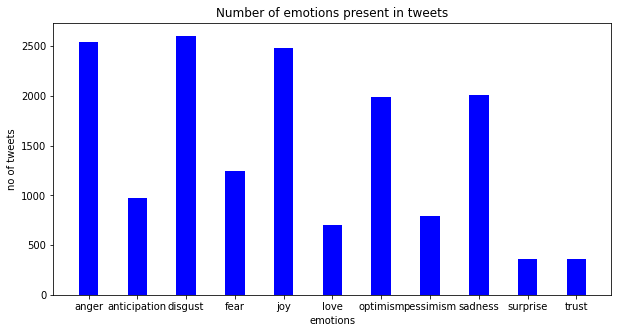

In [7]:
emotions=list(train_data.head(0))
emotions = emotions[2:]
values=[]
for column in emotions:
    values.append(train_data[column].value_counts()[1])


fig = plt.figure(figsize = (10, 5)) 

# creating the bar plot 
plt.bar(emotions, values, color ='blue',width = 0.4)
plt.ylabel("no of tweets") 
plt.xlabel("emotions") 
plt.title("Number of emotions present in tweets") 
plt.show()  

cleaning the text an performing lematization

In [8]:
def clean_text(text):
  lemmatizer = WordNetLemmatizer()
  text = text.lower()
  """make text url free"""
  text = re.sub(r'http\S+',"",text)

  """changing emoji to text"""
  for word in text:
      if word in emoji.UNICODE_EMOJI:
          text = re.sub(r'('+word+')', emoji.demojize(word).replace('_',' ')+' ', text)

  """removing punctuations like  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
  cleaned_text = text.translate(str.maketrans('','',string.punctuation))
  """lemmatization"""
  cleaned_text= " ".join([lemmatizer.lemmatize(word) for word in cleaned_text.split()])
  return(cleaned_text)


In [9]:
for ind in train_data.index: 
      train_data.loc[ind,'Tweet']= clean_text(train_data['Tweet'][ind])
for ind in dev_data.index: 
      dev_data.loc[ind,'Tweet']= clean_text(dev_data['Tweet'][ind])
for ind in test_data.index: 
      test_data.loc[ind,'Tweet']= clean_text(test_data['Tweet'][ind])


In [10]:
del train_data["ID"]
del dev_data["ID"]
del test_data["ID"]


Vectorization

In [11]:
train_text = train_data["Tweet"]
test_text = test_data["Tweet"]
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)
#transform vetor
x_train = vectorizer.transform(train_text)
y_train = train_data.drop(labels = ['Tweet'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test_data.drop(labels = ['Tweet'], axis=1)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
sum = 0
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])
for emotion in emotions:
    print('**Processing {} comments...**'.format(emotion))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train_data[emotion])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    #print(prediction)
    #print(prediction.shape)
    print('Test accuracy is {}%'.format(accuracy_score(test_data[emotion], prediction)*100))
    sum = sum + accuracy_score(test_data[emotion], prediction) * 100
    print("\n")
sum = sum/11
print(f"average accuracy:{sum}")

**Processing anger comments...**
Test accuracy is 71.55569193003988%


**Processing anticipation comments...**
Test accuracy is 86.95918993556305%


**Processing disgust comments...**
Test accuracy is 69.83737342743173%


**Processing fear comments...**
Test accuracy is 85.39429272783062%


**Processing joy comments...**
Test accuracy is 70.23626879410863%


**Processing love comments...**
Test accuracy is 84.5044492175514%


**Processing optimism comments...**
Test accuracy is 67.10647437864375%


**Processing pessimism comments...**
Test accuracy is 88.49340288432035%


**Processing sadness comments...**
Test accuracy is 72.47621969929426%


**Processing surprise comments...**
Test accuracy is 94.81436023320036%


**Processing trust comments...**
Test accuracy is 95.3053083768027%


average accuracy:80.60754832770787


predicting a text

In [13]:
cleaned_text=clean_text(input("enter the text:"))
text = [cleaned_text]
x_text = vectorizer.transform(text)

for emotion in emotions:
  LogReg_pipeline.fit(x_train, train_data[emotion])
  prediction = LogReg_pipeline.predict(x_text)
  if prediction[0] == 1:
    print(f"{emotion}")


enter the text:i am excited to complete the internship
joy
optimism
